In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cats-dataset/cats_dataset.csv


In [2]:
# Load the data
data = pd.read_csv("/kaggle/input/cats-dataset/cats_dataset.csv")

In [3]:
# Display the first few records
print(data.head())

              Breed  Age (Years)  Weight (kg)          Color  Gender
0      Russian Blue           19            7  Tortoiseshell  Female
1  Norwegian Forest           19            9  Tortoiseshell  Female
2         Chartreux            3            3          Brown  Female
3           Persian           13            6          Sable  Female
4           Ragdoll           10            8          Tabby    Male


# Exploring the data

In [4]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        1000 non-null   object
 1   Age (Years)  1000 non-null   int64 
 2   Weight (kg)  1000 non-null   int64 
 3   Color        1000 non-null   object
 4   Gender       1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
None


In [5]:
# Descriptive statistics
print(data.describe())

       Age (Years)  Weight (kg)
count  1000.000000   1000.00000
mean     10.210000      5.55000
std       5.535751      2.22676
min       1.000000      2.00000
25%       5.000000      4.00000
50%      10.000000      6.00000
75%      15.000000      7.00000
max      19.000000      9.00000


# Fields and data types 🗒️:
| Variable  | Definition                              | Key                                             |
|-----------|----------------------------------------|-------------------------------------------------|
| breed     | Specifies the breed of each cat        | Includes breeds like Siamese, Maine Coon, Persian, Bengal, and more |
| age_years | Indicates the age of the cats in years | Provides information about both young kittens and mature adults |
| weight_kg | Records the weight of each cat in kg   | Highlights size variations across different breeds and ages |
| color     | Describes the coat color               | Ranges from solid colors like black and white to patterns like calico and tabby |
| gender    | Denotes the gender of each cat         | Categorized as either Male or Female |

In [6]:
# Display the dimensions of the dataset
data.shape

(1000, 5)

In [7]:
# Display column names of the dataset
data.columns.values

array(['Breed', 'Age (Years)', 'Weight (kg)', 'Color', 'Gender'],
      dtype=object)

In [8]:
# Renames the dataset and removes the space
data=data.rename(columns={
    "Age (Years)":"Age",
    "Weight (kg)": "Weight(kg)"
    })
data.head()

,Breed,Age,Weight(kg),Color,Gender
0,Russian Blue,19,7,Tortoiseshell,Female
1,Norwegian Forest,19,9,Tortoiseshell,Female
2,Chartreux,3,3,Brown,Female
3,Persian,13,6,Sable,Female
4,Ragdoll,10,8,Tabby,Male


# Handling missing data

In [9]:
# Handling missing data
print(data.isnull().sum())

Breed         0
Age           0
Weight(kg)    0
Color         0
Gender        0
dtype: int64


In [10]:
# Check for unique values in each categorical column
for col in ['Breed', 'Color', 'Gender']:
    unique_values = data[col].unique()
    print(f"Unique values in{col}: {unique_values}")

Unique values inBreed: ['Russian Blue' 'Norwegian Forest' 'Chartreux' 'Persian' 'Ragdoll'
 'Ocicat' 'Abyssinian' 'Oriental' 'Egyptian Mau' 'American Shorthair'
 'Bengal' 'Cornish Rex' 'British Shorthair' 'Burmese' 'Singapura'
 'Maine Coon' 'Turkish Angora' 'Himalayan' 'Sphynx' 'Manx' 'Siberian'
 'Birman' 'Balinese' 'Devon Rex' 'Exotic Shorthair' 'Scottish Fold'
 'Savannah' 'Munchkin' 'Siamese' 'Tonkinese']
Unique values inColor: ['Tortoiseshell' 'Brown' 'Sable' 'Tabby' 'Blue' 'Calico' 'White' 'Black'
 'Pointed' 'Red' 'Tricolor' 'Cream' 'Orange' 'Gray' 'Bicolor']
Unique values inGender: ['Female' 'Male']


# EDA (Exploratory Data Analysis)

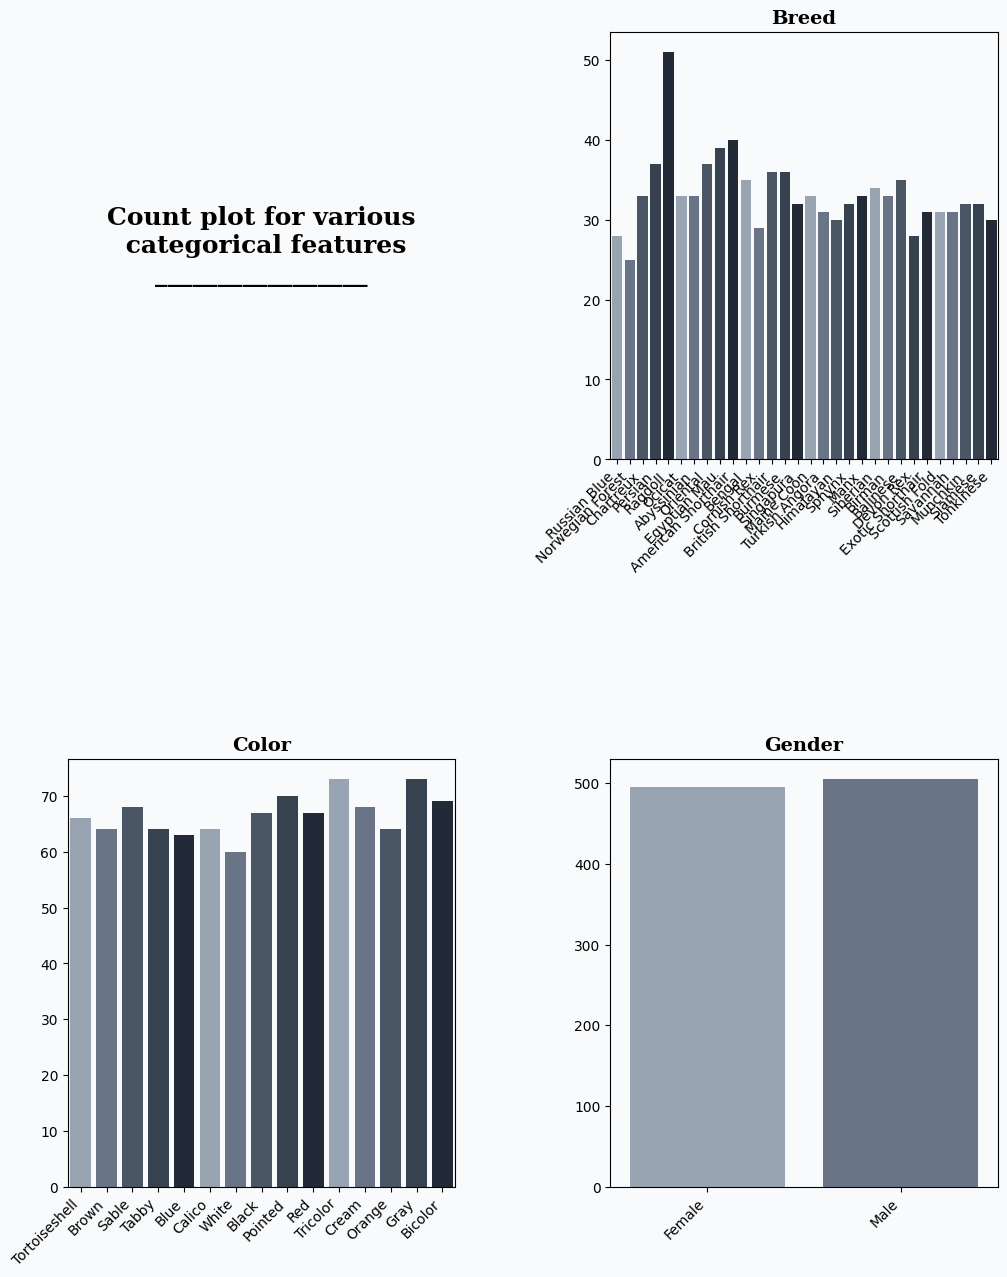

In [11]:
# Figure adjustments

# Larger size for better visualization
fig = plt.figure(figsize=(12, 15))  
gs = fig.add_gridspec(2, 2)
# Increases space between subplots
gs.update(wspace=0.4, hspace=0.7)  


background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)
axes = [fig.add_subplot(gs[i,j]) for i in range(2) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for various\n categorical features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot for each categorical feature
plot_features = ['Breed', 'Color', 'Gender']
titles = ["Breed", "Color", "Gender"]

for i, feature in enumerate(plot_features):
    ax = axes[i + 1]
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    sns.countplot(ax=ax, data=data, x=feature, palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Adjust and show
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


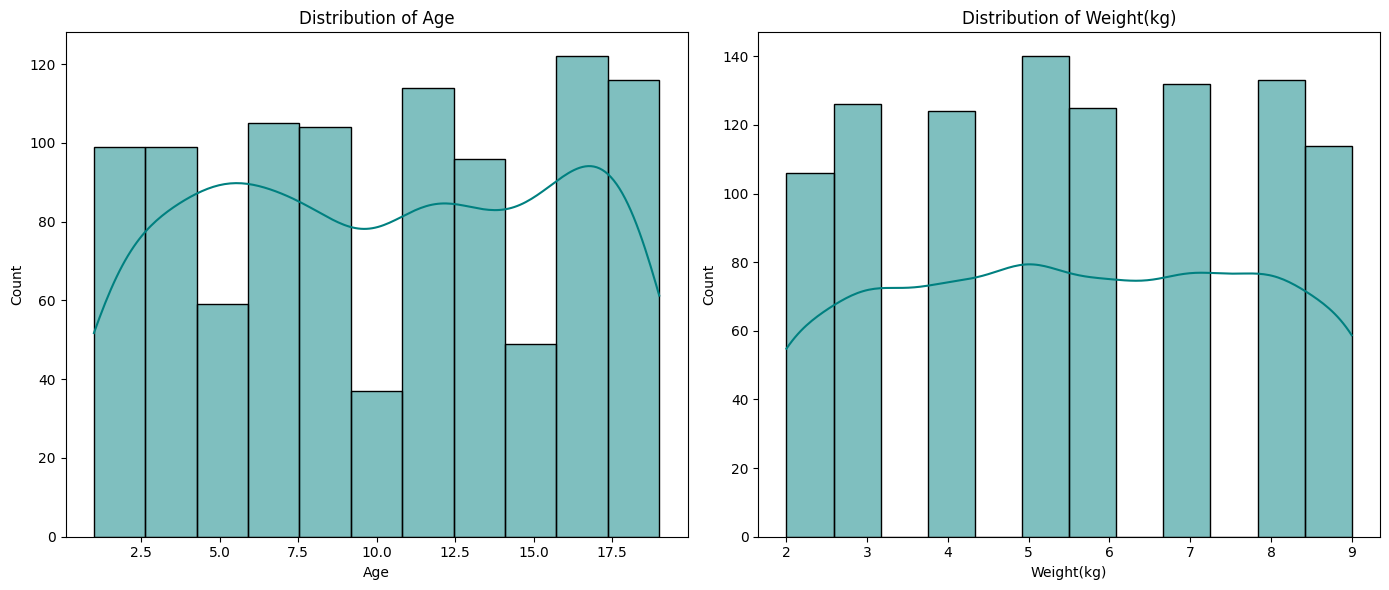

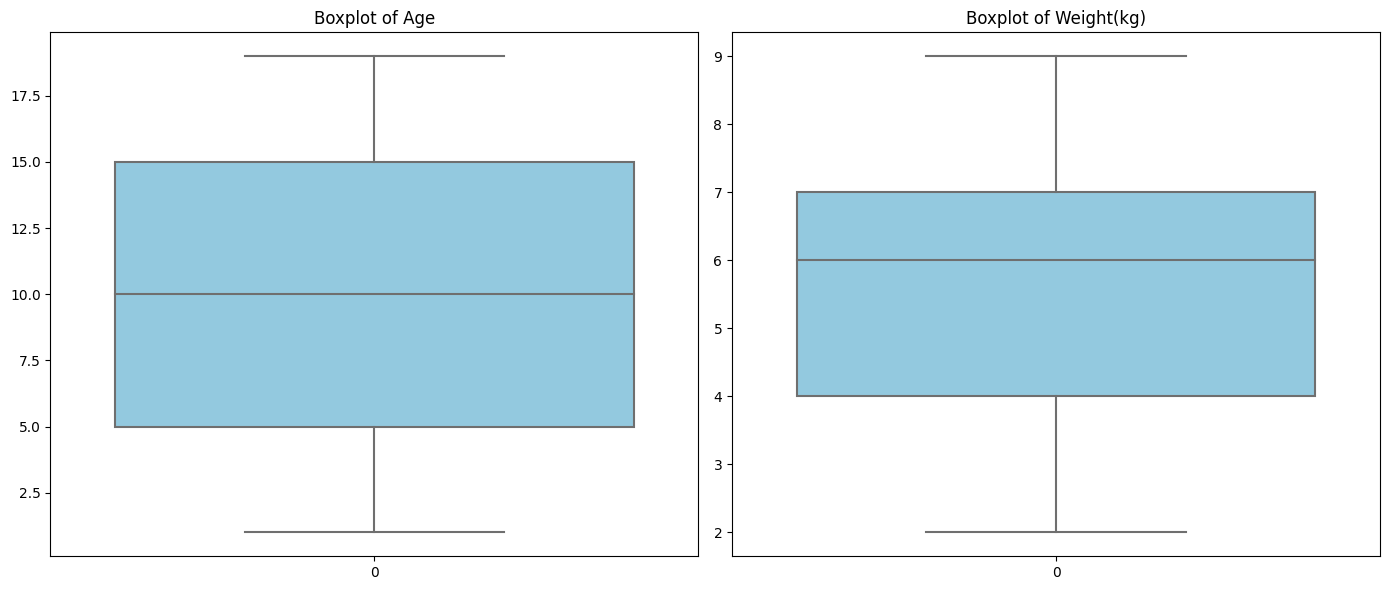

In [12]:
# Histograms for numeric columns
numeric_columns = ['Age', 'Weight(kg)']
plt.figure(figsize=(14, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(data[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots for numeric columns
plt.figure(figsize=(14, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

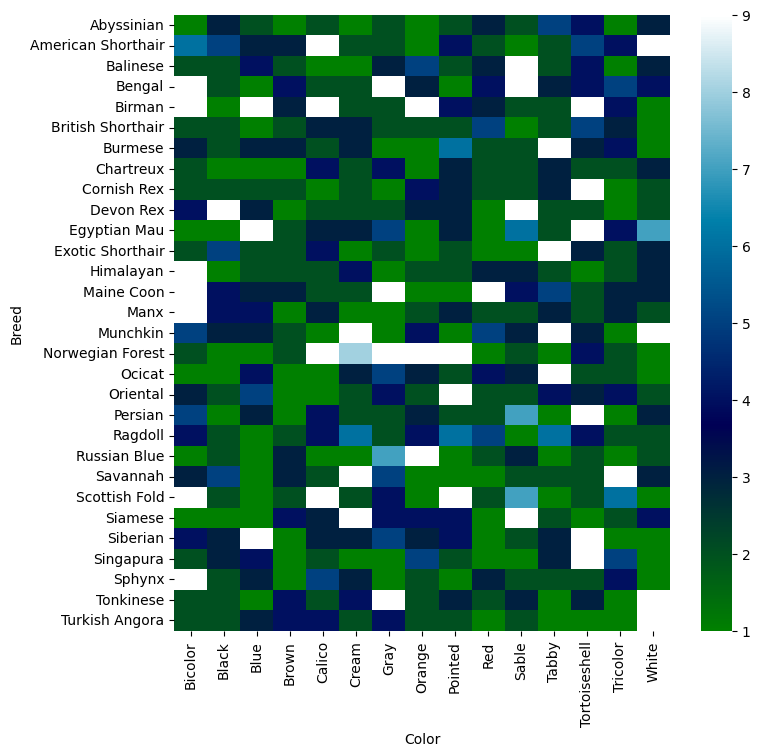

In [13]:
# Breed vs Color
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Breed'].value_counts()
    for x_label, grp in data.groupby('Color')
})
sns.heatmap(df_2dhist, cmap='ocean')
plt.xlabel('Color')
_ = plt.ylabel('Breed')

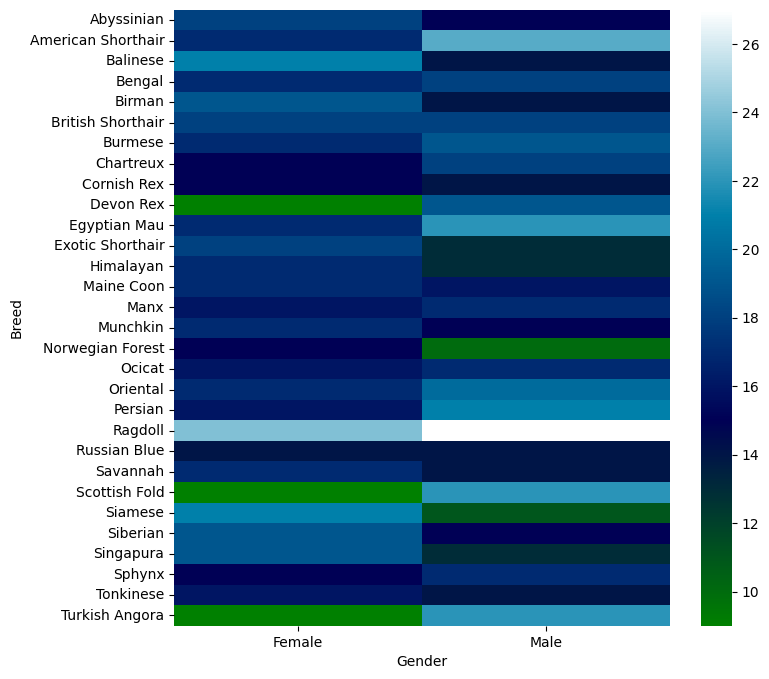

In [14]:
# Breed vs Gender
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Breed'].value_counts()
    for x_label, grp in data.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='ocean')
plt.xlabel('Gender')
_ = plt.ylabel('Breed')

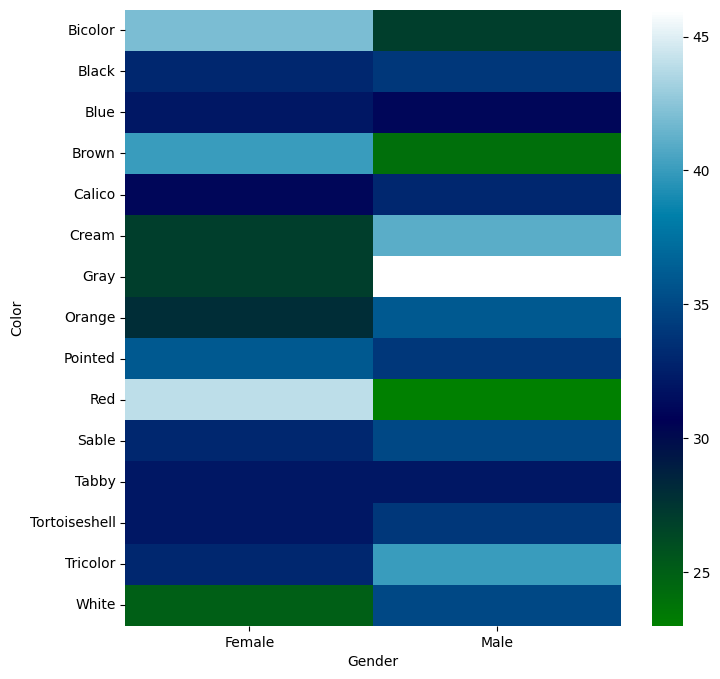

In [15]:
# Gender vs Color
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Color'].value_counts()
    for x_label, grp in data.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='ocean')
plt.xlabel('Gender')
_ = plt.ylabel('Color')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

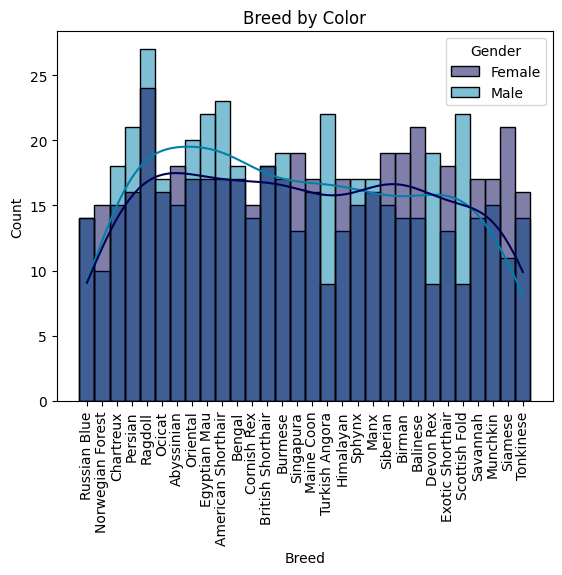

In [16]:
# Breed by Color
plt.xticks(rotation=90)
sns.histplot(data=data, x='Breed', hue="Gender",palette="ocean", kde=True)
plt.title('Breed by Color')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

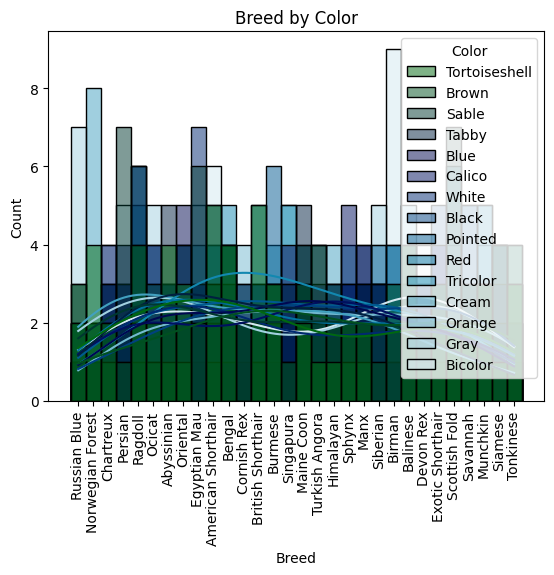

In [17]:
# Breed by Color
plt.xticks(rotation=90)
sns.histplot(data=data, x='Breed', hue="Color",palette="ocean", kde=True)
plt.title('Breed by Color')
plt.show()

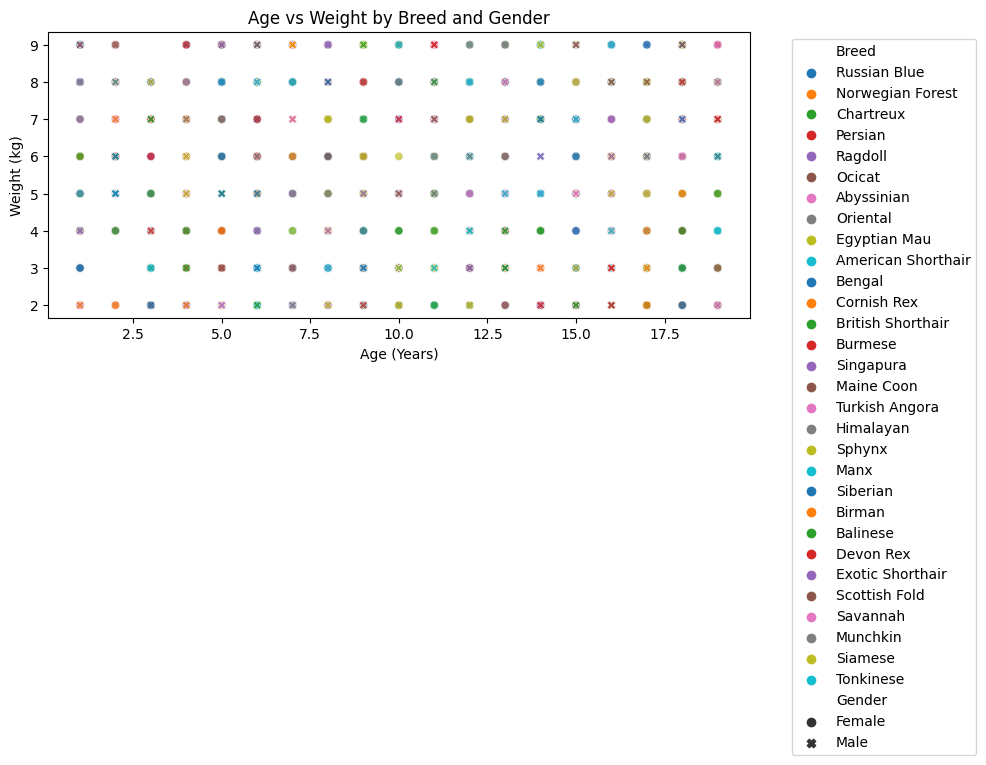

In [18]:
# Age vs Weight by Breed and Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Weight(kg)', hue='Breed', style='Gender', palette='tab10', alpha=0.7)
plt.title('Age vs Weight by Breed and Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Weight (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

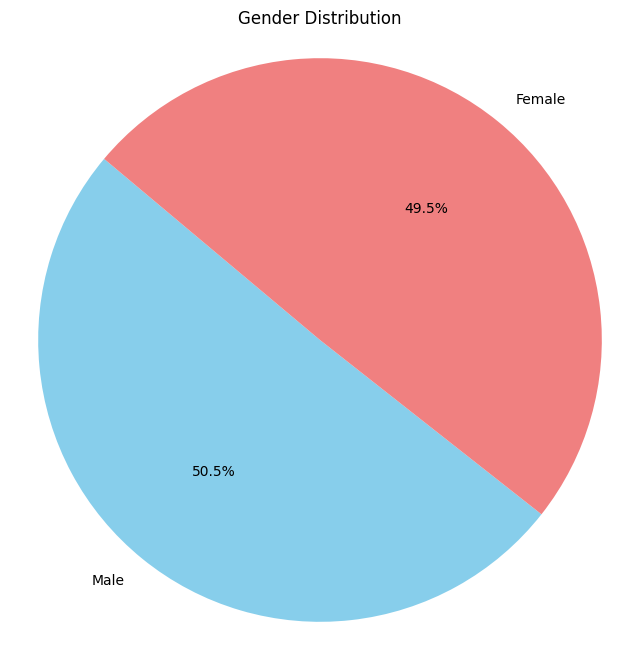

In [19]:
# Pie chart for gender distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

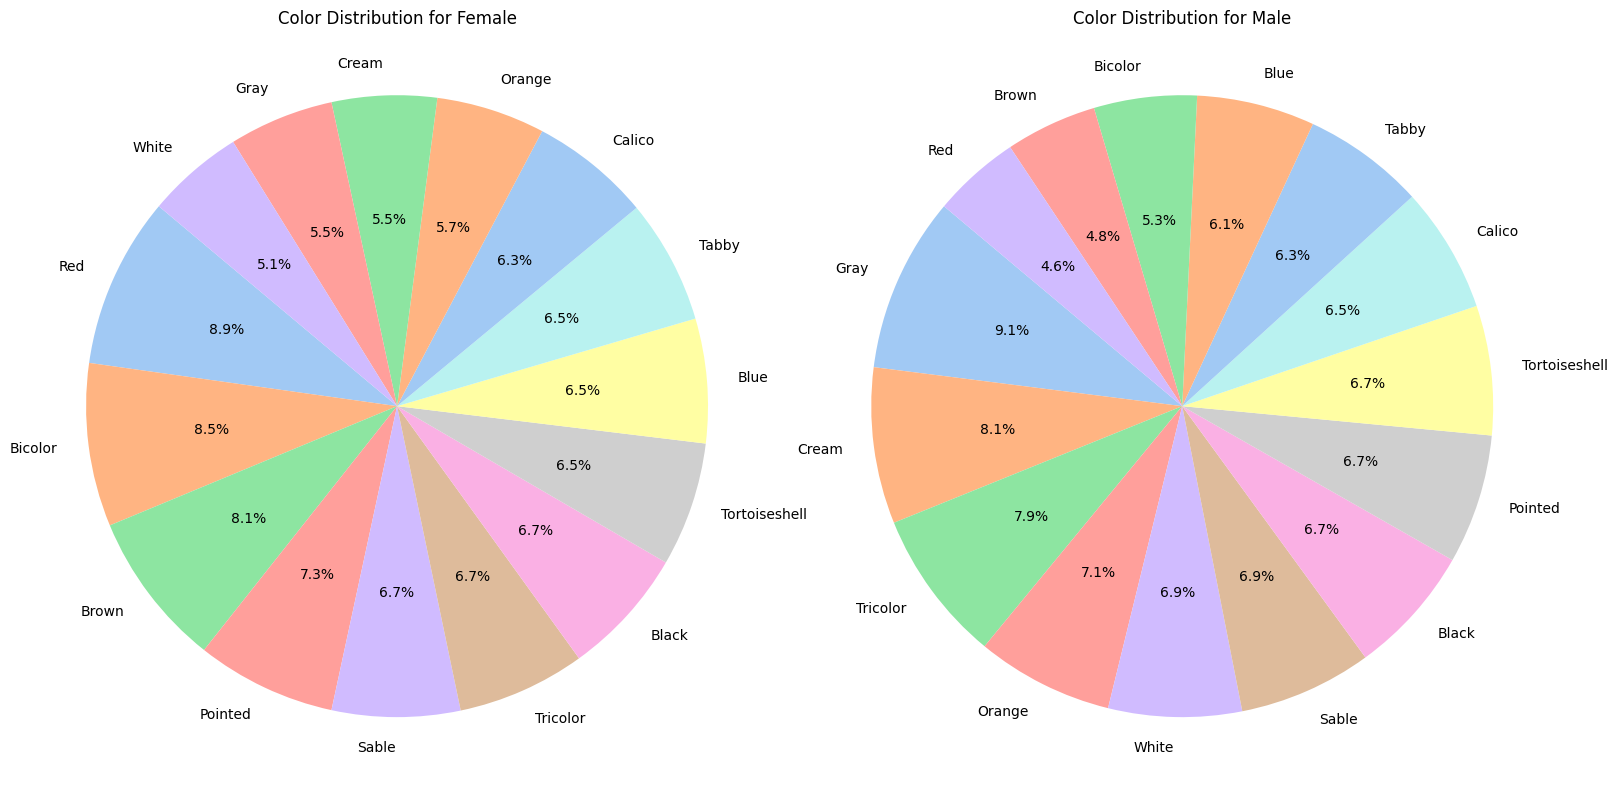

In [20]:
# Pie chart for color distribution by gender
plt.figure(figsize=(16, 8))
for i, gender in enumerate(data['Gender'].unique()):
    plt.subplot(1, 2, i + 1)
    color_counts = data[data['Gender'] == gender]['Color'].value_counts()
    plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(f'Color Distribution for {gender}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

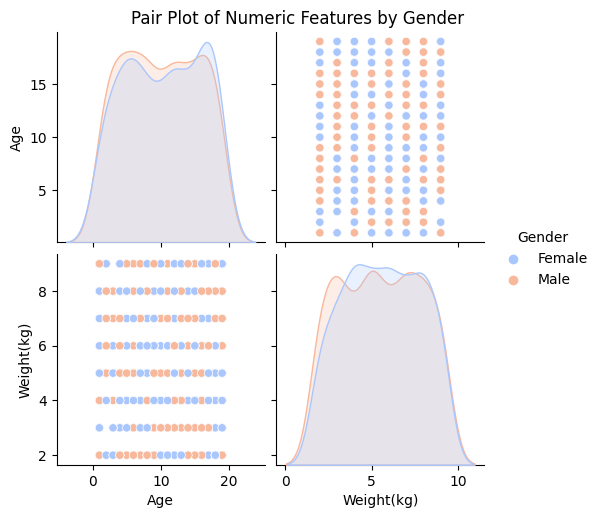

In [21]:
# Pair Plot of Numeric Features by Gender
sns.pairplot(data, hue='Gender', palette='coolwarm', height=2.5)
plt.suptitle('Pair Plot of Numeric Features by Gender', y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


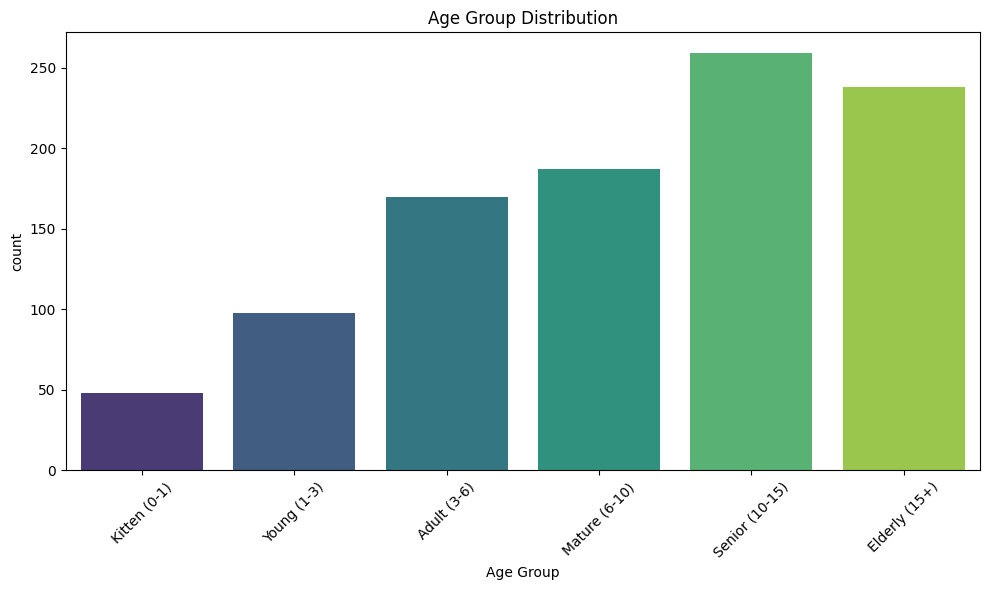

In [22]:
bins = [0, 1, 3, 6, 10, 15, np.inf]
labels = ['Kitten (0-1)', 'Young (1-3)', 'Adult (3-6)', 'Mature (6-10)', 'Senior (10-15)', 'Elderly (15+)']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Plot the age group distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age Group', palette='viridis')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gender            Female      Male
Age Group                         
Kitten (0-1)    0.562500  0.437500
Young (1-3)     0.418367  0.581633
Adult (3-6)     0.505882  0.494118
Mature (6-10)   0.470588  0.529412
Senior (10-15)  0.490347  0.509653
Elderly (15+)   0.529412  0.470588


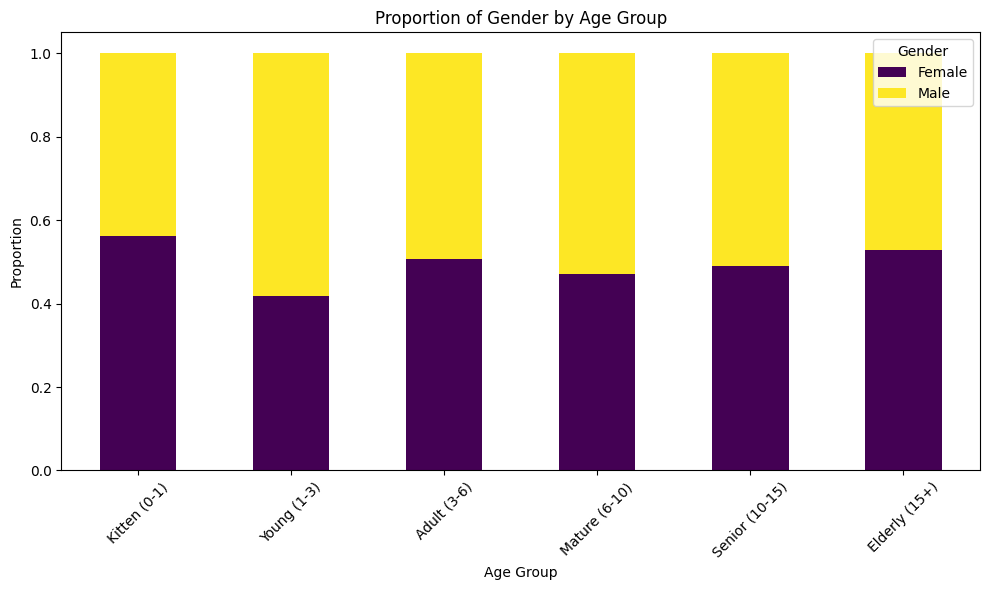

In [23]:
# Contingency table for gender ratio by age group
age_gender_ct = pd.crosstab(data['Age Group'], data['Gender'], normalize='index')
print(age_gender_ct)

# View the table
age_gender_ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Proportion of Gender by Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

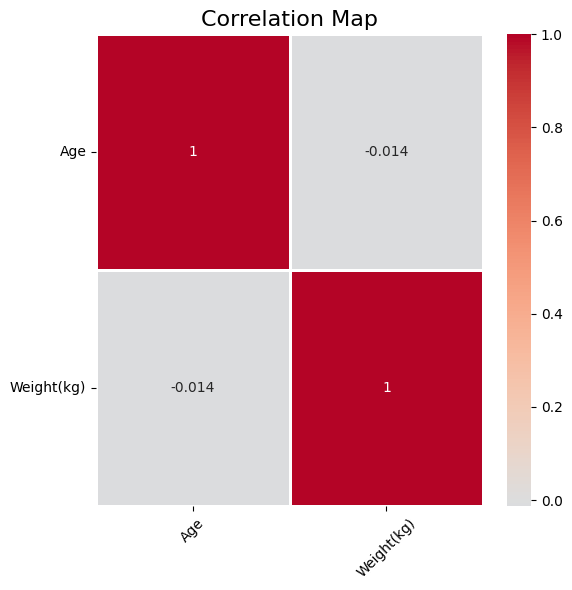

In [24]:
# Select numeric columns from the dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(6, 6))  # Increase figure size
plt.title('Correlation Map', fontsize=16)  # Add font size to title
ax = sns.heatmap(numeric_columns.corr(), linewidths=1, annot=True, center=0, cmap="coolwarm")  # Adjust spacing and use cmap
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels without rotation
plt.tight_layout()  # Automatically adjust spacing between subplots so that the elements of the plot fit into the figure
plt.show()

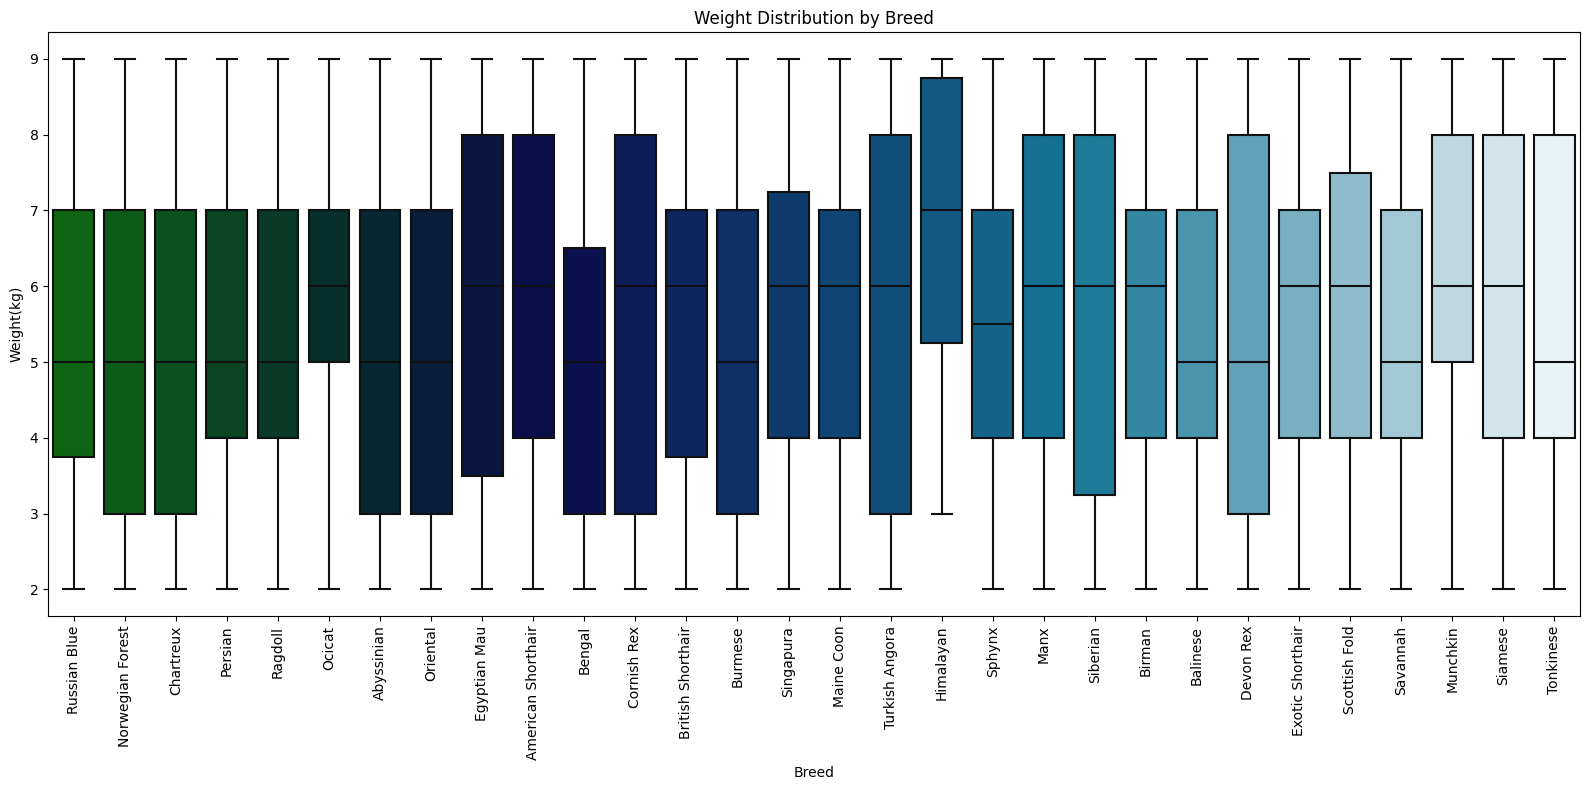

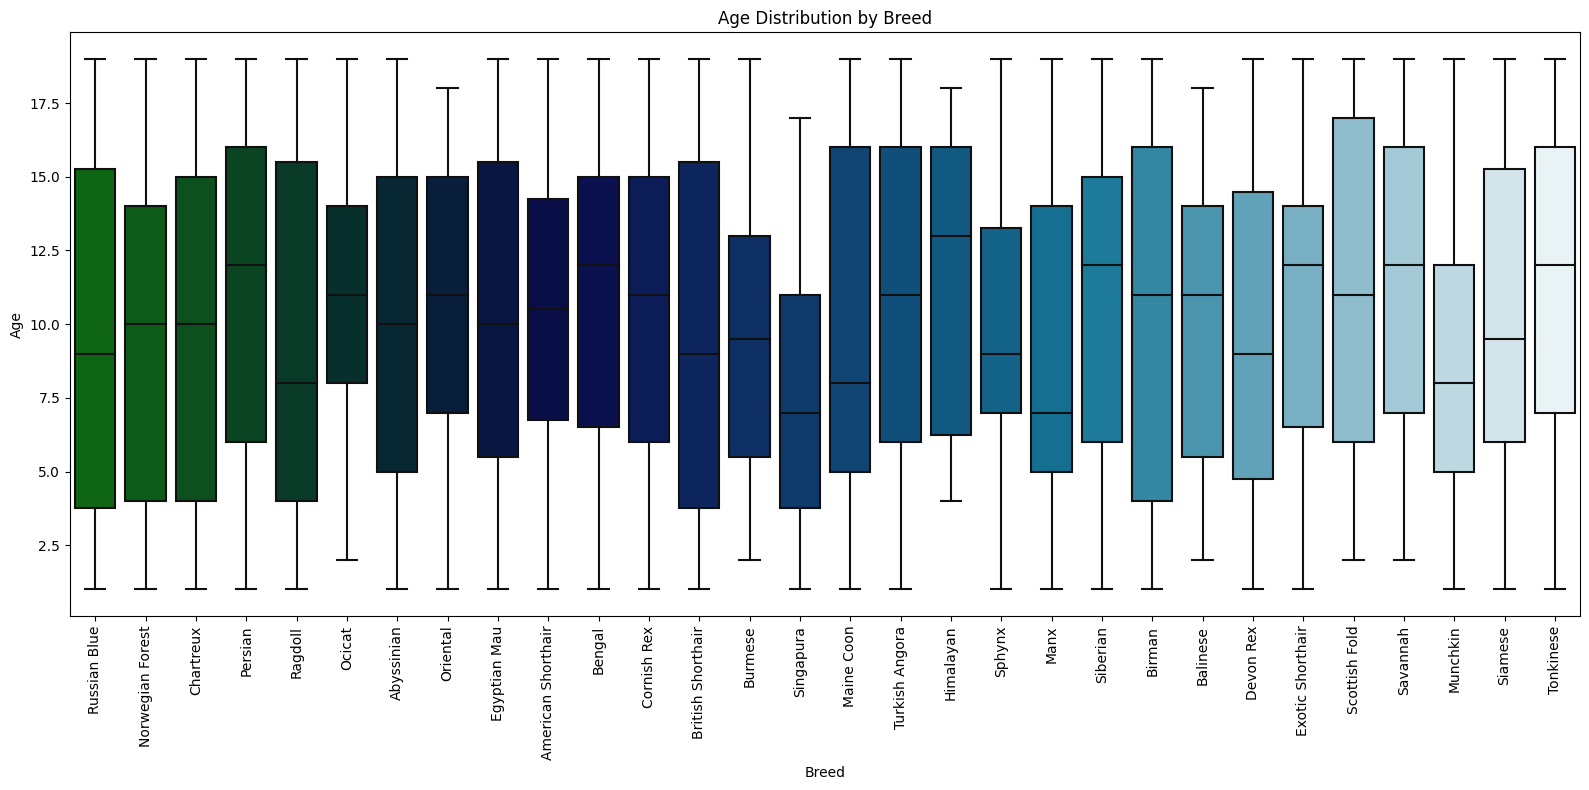

In [25]:
# Weight Distribution by Breed
plt.figure(figsize=(16, 8))
sns.boxplot(x='Breed', y='Weight(kg)', data=data, palette='ocean')
plt.title('Weight Distribution by Breed')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Age Distribution by Breed
plt.figure(figsize=(16, 8))
sns.boxplot(x='Breed', y='Age', data=data, palette='ocean')
plt.title('Age Distribution by Breed')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

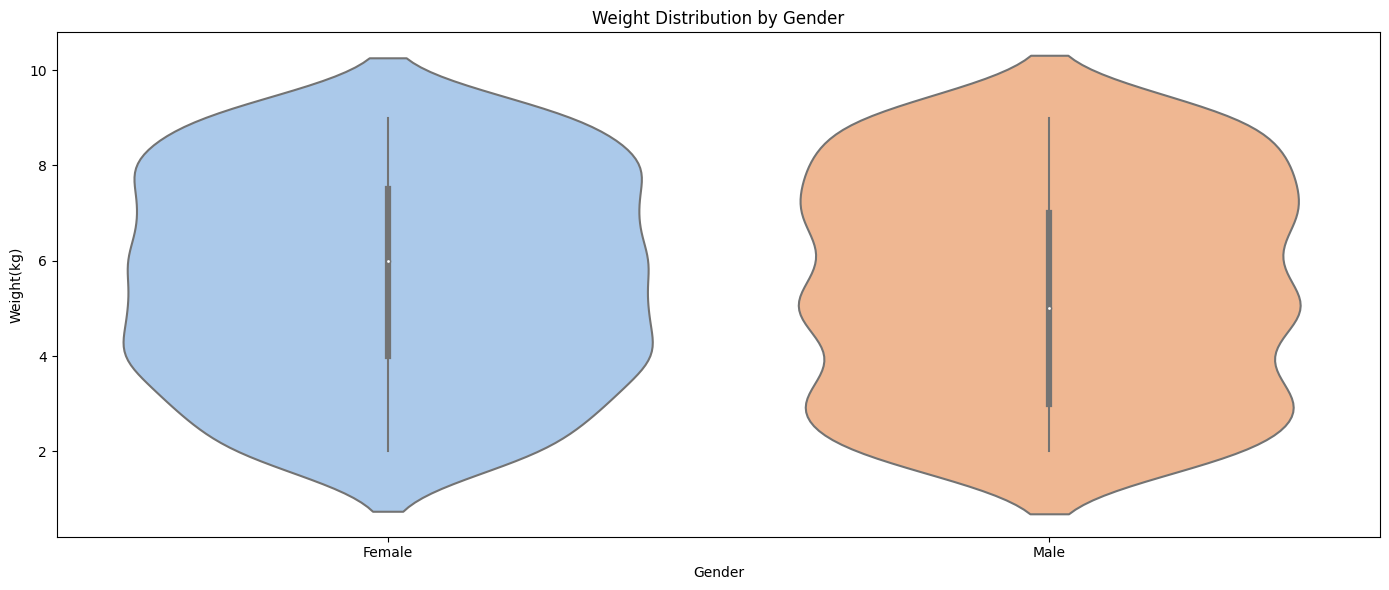

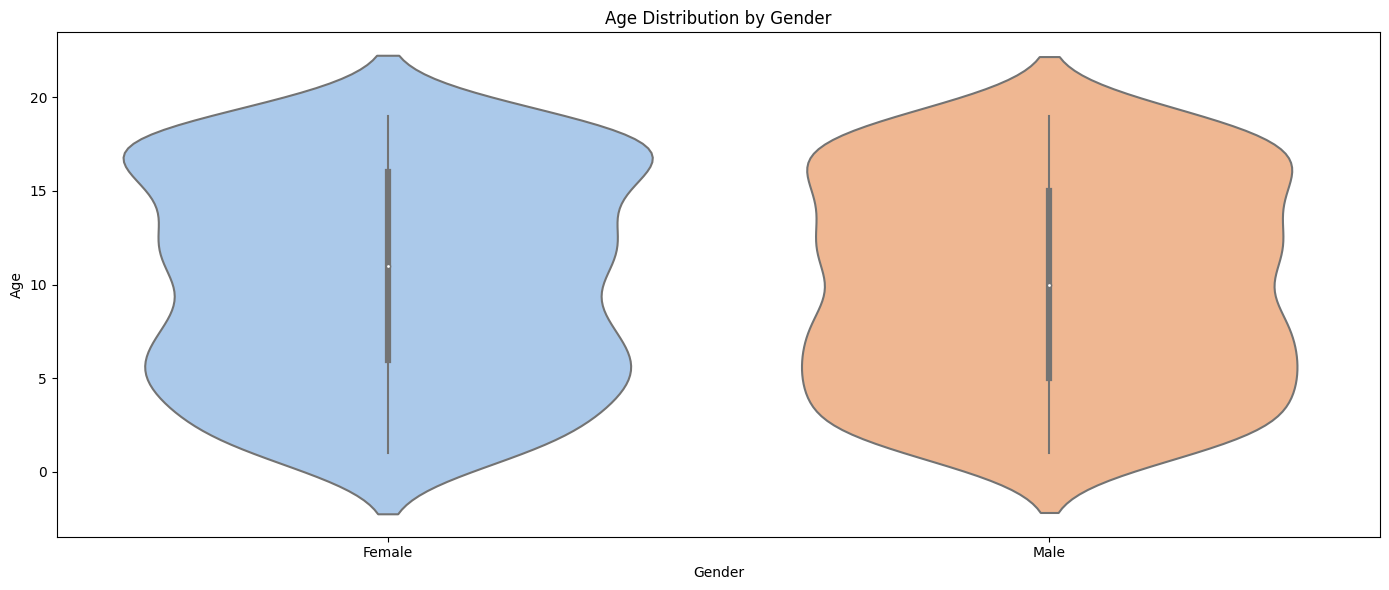

In [26]:
# Weight Distribution by Gender
plt.figure(figsize=(14, 6))
sns.violinplot(x='Gender', y='Weight(kg)', data=data, palette='pastel')
plt.title('Weight Distribution by Gender')
plt.tight_layout()
plt.show()

# Age Distribution by Gender
plt.figure(figsize=(14, 6))
sns.violinplot(x='Gender', y='Age', data=data, palette='pastel')
plt.title('Age Distribution by Gender')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


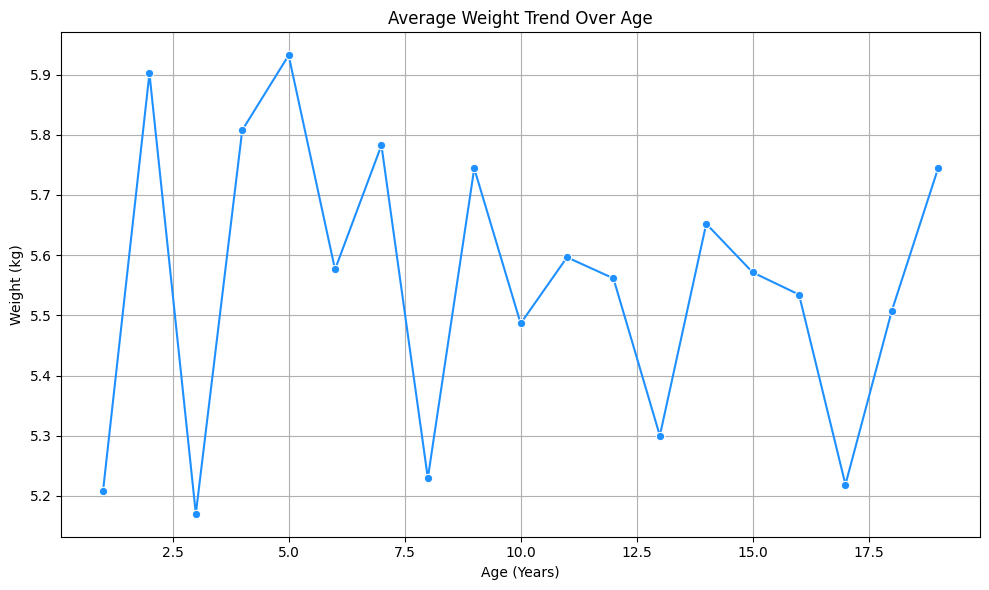

In [27]:
# Average Weight Trend Over Age
age_weight_trend = data.groupby('Age')['Weight(kg)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Weight(kg)', data=age_weight_trend, marker='o', color='dodgerblue')
plt.title('Average Weight Trend Over Age')
plt.xlabel('Age (Years)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Sklearn (Cluster)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


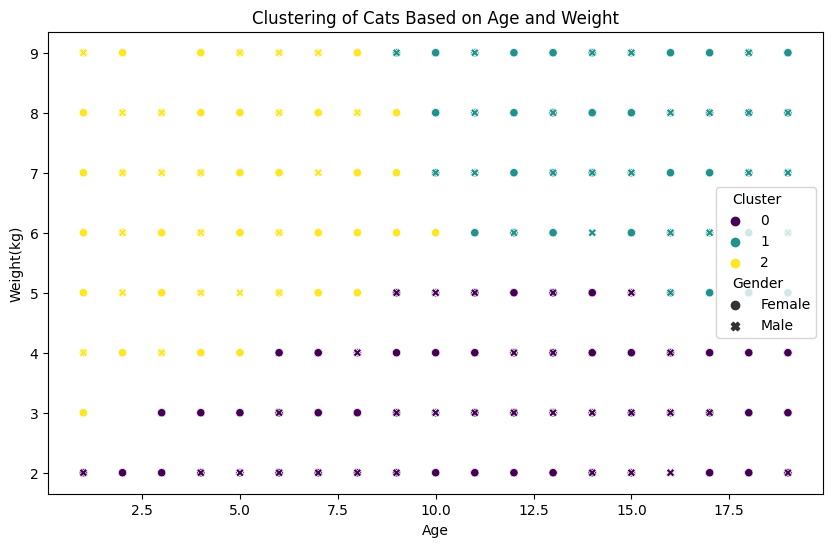

In [28]:
# Select the numerical features
data_numeric = data[['Age', 'Weight(kg)']]

# Estandariza los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Weight(kg)', hue='Cluster', palette='viridis', style='Gender')
plt.title('Clustering of Cats Based on Age and Weight')
plt.show()

/tmp/ipykernel_804/1232072587.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


================ Full Data Analysis Report =================
======== Statistical Summary of Numerical Variables ========
           Age  Weight(kg)  Cluster
count  1000.00     1000.00  1000.00
mean     10.21        5.55     0.97
std       5.54        2.23     0.84
min       1.00        2.00     0.00
25%       5.00        4.00     0.00
50%      10.00        6.00     1.00
75%      15.00        7.00     2.00
max      19.00        9.00     2.00


================== Missing Values Report ===================
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


========== Distribution of Categorical Variables ===========
Distribution of Breed:
                                 Breed  Count  Percentage (%)
Breed                                                        
Ragdoll                        Ragdoll     51             5.1
American Shorthair  American Shorthair     40             4.0
Egyptian Mau              Egyptian Mau     39             3.9
Persian                    

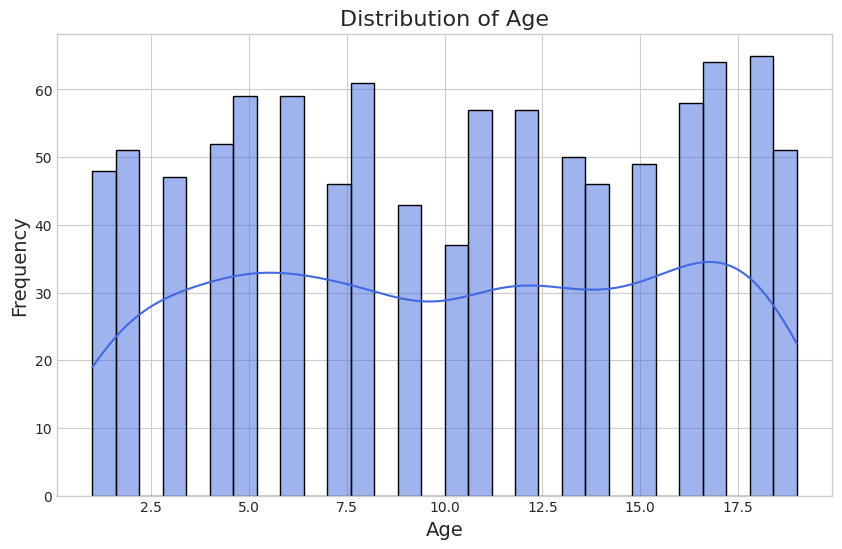

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


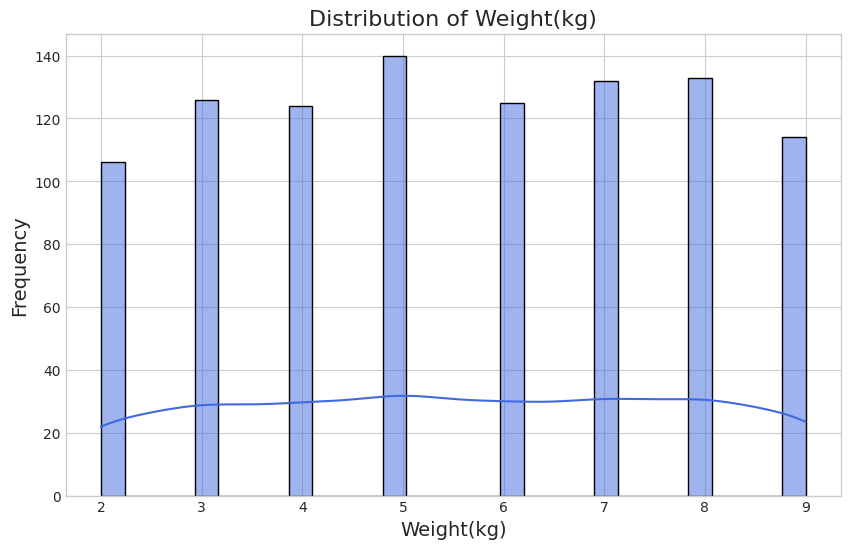

====== Plotting Bar Graphs for Categorical Variables =======


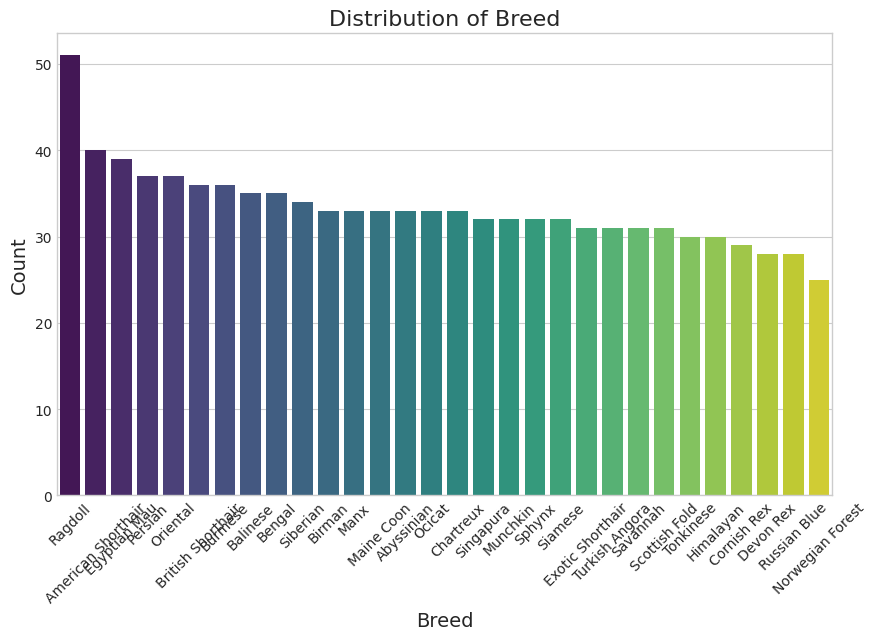

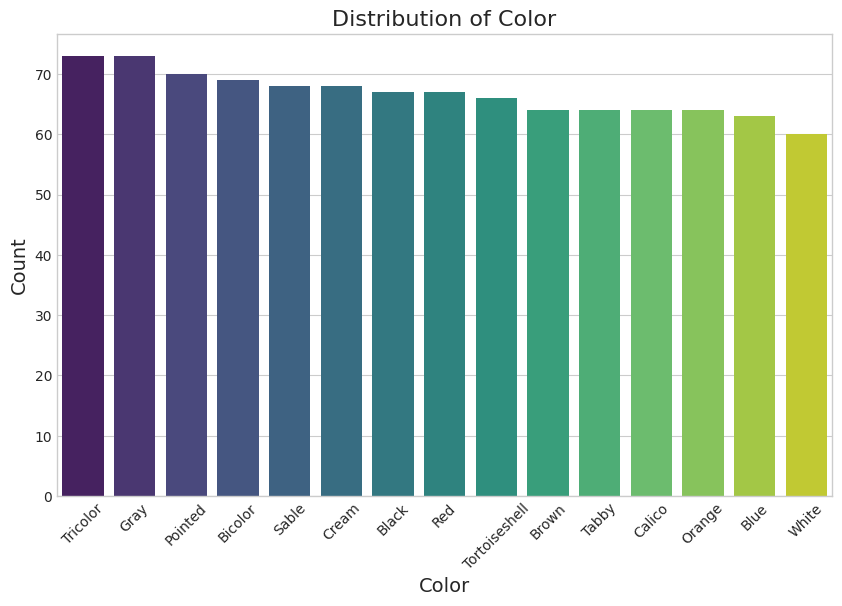

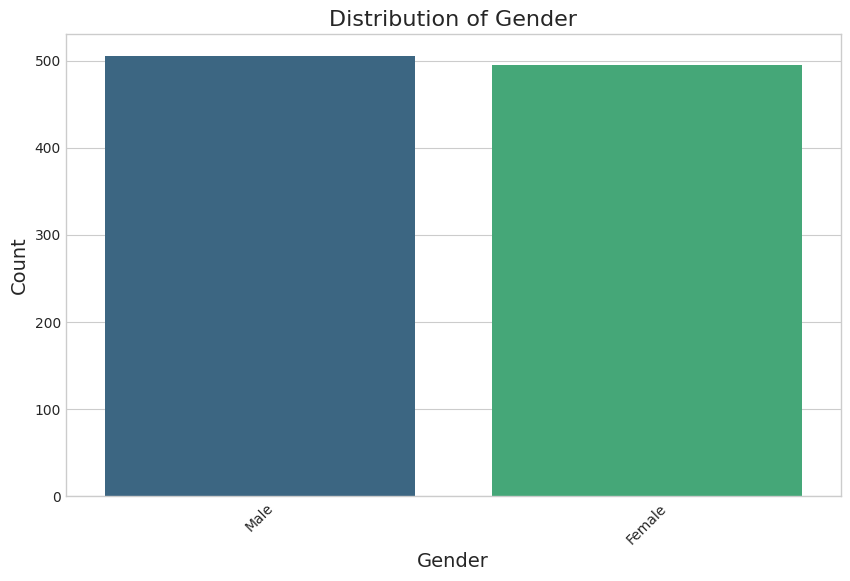

=================== Correlation Analysis ===================
                 Age  Weight(kg)   Cluster
Age         1.000000   -0.013602 -0.517984
Weight(kg) -0.013602    1.000000  0.623822
Cluster    -0.517984    0.623822  1.000000


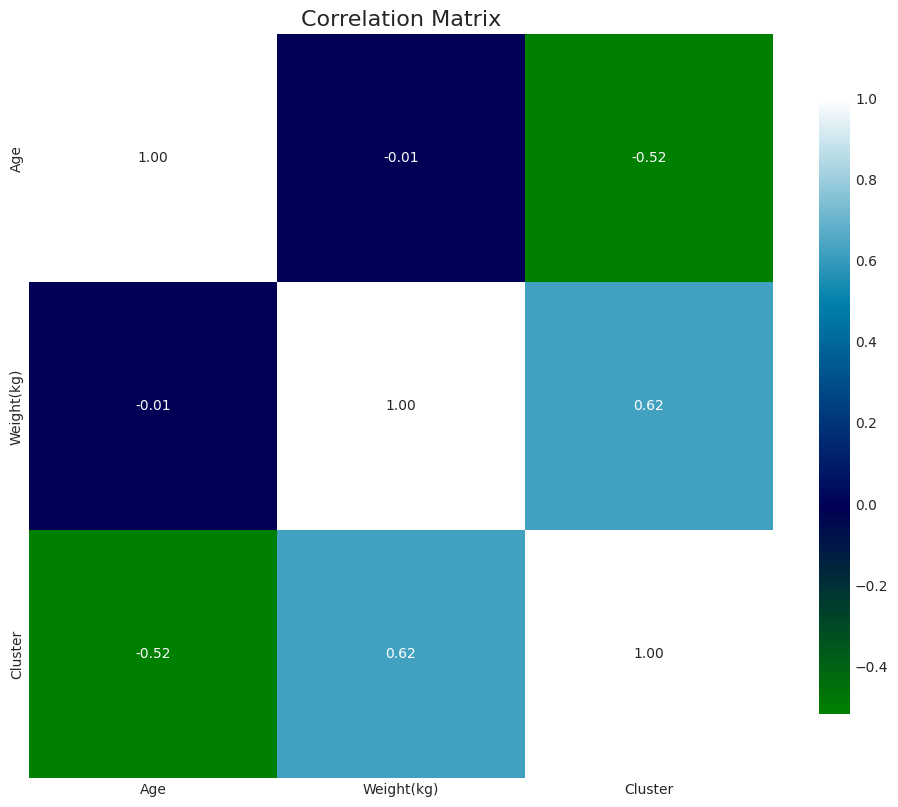

============= Plotting Pairwise Relationships ==============


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable 

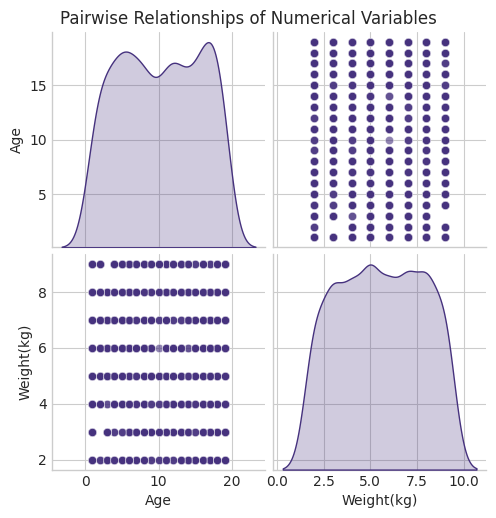

==================== Plotting Outliers =====================


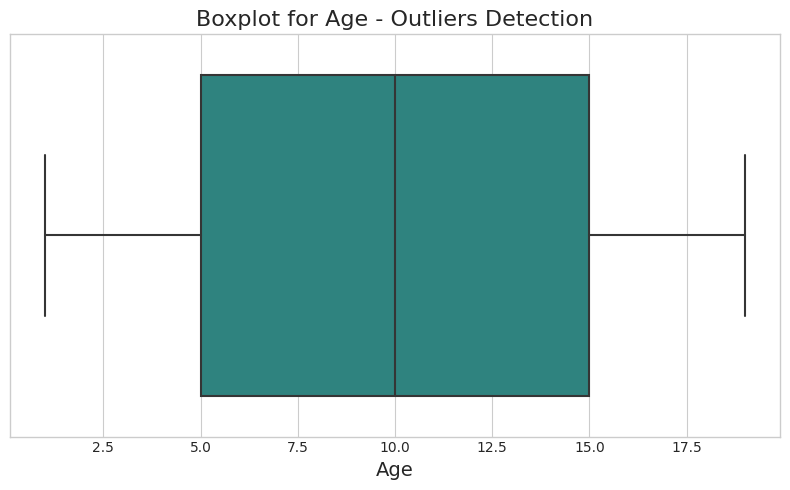

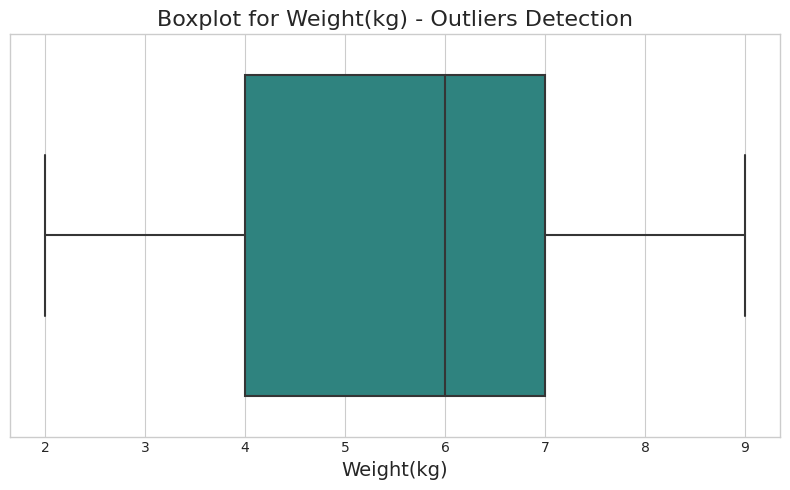

========== Unique Values in Categorical Variables ==========
Unique values in Breed: ['Russian Blue' 'Norwegian Forest' 'Chartreux' 'Persian' 'Ragdoll'
 'Ocicat' 'Abyssinian' 'Oriental' 'Egyptian Mau' 'American Shorthair'
 'Bengal' 'Cornish Rex' 'British Shorthair' 'Burmese' 'Singapura'
 'Maine Coon' 'Turkish Angora' 'Himalayan' 'Sphynx' 'Manx' 'Siberian'
 'Birman' 'Balinese' 'Devon Rex' 'Exotic Shorthair' 'Scottish Fold'
 'Savannah' 'Munchkin' 'Siamese' 'Tonkinese']

Unique values in Color: ['Tortoiseshell' 'Brown' 'Sable' 'Tabby' 'Blue' 'Calico' 'White' 'Black'
 'Pointed' 'Red' 'Tricolor' 'Cream' 'Orange' 'Gray' 'Bicolor']

Unique values in Gender: ['Female' 'Male']

=============== Report Generation Completed ================


In [33]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette and styling
sns.set_palette("viridis")
plt.style.use('seaborn-whitegrid')

# Load the data
# data = pd.read_csv('path_to_your_data.csv')

# Function to generate a statistical summary of numerical variables
def generate_statistical_summary(data):
    print(" Statistical Summary of Numerical Variables ".center(60, "="))
    print(data.describe().round(2))
    print("\n")

# Function to generate the count and percentages of missing values
def missing_values_report(data):
    print(" Missing Values Report ".center(60, "="))
    missing_values = data.isnull().sum()
    missing_percentage = (missing_values / len(data)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
    print(missing_df[missing_df['Missing Values'] > 0])
    print("\n")

# Function to display distribution of categorical variables
def categorical_distribution(data, categorical_cols):
    print(" Distribution of Categorical Variables ".center(60, "="))
    for col in categorical_cols:
        print(f"Distribution of {col}:")
        counts = data[col].value_counts()
        percentages = (counts / counts.sum()) * 100
        distribution_df = pd.DataFrame({col: counts.index, 'Count': counts.values, 'Percentage (%)': percentages.round(2)})
        print(distribution_df)
        print("\n")

# Function to plot distribution graphs for numerical variables
def plot_numerical_distributions(data, numerical_cols):
    print(" Plotting Distribution of Numerical Variables ".center(60, "="))
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=True, bins=30, edgecolor='black', color='royalblue')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.show()

# Function to create bar graphs for categorical variables
def plot_categorical_bars(data, categorical_cols):
    print(" Plotting Bar Graphs for Categorical Variables ".center(60, "="))
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=data, palette='viridis', order=data[col].value_counts().index)
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45)
        plt.show()

# Correlation analysis between numerical variables
def correlation_analysis(data):
    print(" Correlation Analysis ".center(60, "="))
    
    # Select only the numeric columns for correlation analysis
    numeric_data = data.select_dtypes(include='number')
    
    corr = numeric_data.corr()
    print(corr)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="ocean", square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

# Function to visualize relationships between numerical variables using pair plots
def plot_pairwise_relationships(data, numerical_cols):
    print(" Plotting Pairwise Relationships ".center(60, "="))
    sns.pairplot(data[numerical_cols], kind='scatter', diag_kind='kde', palette='viridis', plot_kws={'alpha':0.6})
    plt.suptitle('Pairwise Relationships of Numerical Variables', y=1.02)
    plt.show()

# Function to identify and plot outliers using boxplots
def plot_outliers(data, numerical_cols):
    print(" Plotting Outliers ".center(60, "="))
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=data[col], palette="viridis")
        plt.title(f'Boxplot for {col} - Outliers Detection', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.tight_layout()
        plt.show()

# Function to create a report of unique values in categorical columns
def unique_values_report(data, categorical_cols):
    print(" Unique Values in Categorical Variables ".center(60, "="))
    for col in categorical_cols:
        unique_values = data[col].unique()
        print(f"Unique values in {col}: {unique_values}\n")

# Function to generate a complete report
def generate_full_report(data, numerical_cols, categorical_cols):
    print(" Full Data Analysis Report ".center(60, "="))
    generate_statistical_summary(data)
    missing_values_report(data)
    categorical_distribution(data, categorical_cols)
    plot_numerical_distributions(data, numerical_cols)
    plot_categorical_bars(data, categorical_cols)
    correlation_analysis(data)
    plot_pairwise_relationships(data, numerical_cols)
    plot_outliers(data, numerical_cols)
    unique_values_report(data, categorical_cols)
    print(" Report Generation Completed ".center(60, "="))

# Define numerical and categorical columns
numerical_columns = ['Age', 'Weight(kg)']  # Replace with your numerical columns
categorical_columns = ['Breed', 'Color', 'Gender']  # Replace with your categorical columns

# Execute the full report generation
# Uncomment the line below to run the report
generate_full_report(data, numerical_columns, categorical_columns)